                                                Uvod
   Ovaj rad će koristiti podatke o stopama suicida u svetu po godinama na osnovu čega će se pokušati odgovoriti na određena istraživačka pitanja koja su definisan dalje u tekstu. Na početku, dataset će se srediti na taj način ne bi li omogućio lakšu dalju analizu, potom će se pristupiti njegovom istraživanju ne bi li se bolje upoznali sa podacima. Nakon toga slede istraživačka pitanja i na samom kraju rada, kad se odgovori na pitanja, pristupiće se modelovanju podataka da bi videli da li možemo da predviđamo stopu suicida na osnovu dostupnih podataka u ovom datasetu. 

In [1]:
df <- read.csv(".\\master.csv")
head(df)

,ď.żcountry,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


In [2]:
#Napraviću nov dataframe koji će predstavljati sređen prethodni dataframe
reworked.df <- df

#Potrebno je preimenovati kolone
names(reworked.df)[1] <- "country"

#Prvo obrisati suvišne tačke na krajevima naziva kolona
dots.delete <- function (name){
    return(sub("\\.{2,}","", name))
}

names(reworked.df) <- sapply(names(reworked.df), dots.delete)

#Sad je potrebno promeniti "_" u "." da bi imali iste notacije u kolonama
column.notation <- function (column){
    return(gsub("_", ".", column))
}

names(reworked.df) <- sapply(names(reworked.df), column.notation)

#Menjamo"HDI" u malo "hdi"
names(reworked.df) <- sapply(names(reworked.df), tolower)

#gdp.for.year iz string u numeric
reworked.df$gdp.for.year <- sapply(reworked.df$gdp.for.year, function(x) {gsub(",", "", x)})
reworked.df$gdp.for.year <- sapply(reworked.df$gdp.for.year, as.numeric)

#Potrebno napraviti faktore
reworked.df$sex <- as.factor(reworked.df$sex)
reworked.df$age <- factor(reworked.df$age, level=c(
"5-14 years", "15-24 years","25-34 years", "35-54 years", "55-74 years", "75+ years"), ordered = TRUE)

#unique(reworked.df$generation)

reworked.df$generation <- factor(reworked.df$generation, level=c(
"G.I. Generation", "Silent", "Boomers", "Generation X", "Millenials", "Generation Z"))

head(reworked.df)

,country,year,sex,age,suicides.no,population,suicides.100k.pop,country.year,hdi.for.year,gdp.for.year,gdp.per.capita,generation
,<chr>,<int>,<fct>,<ord>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<fct>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,2156624900,796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,2156624900,796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,2156624900,796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,2156624900,796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,2156624900,796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,2156624900,796,G.I. Generation


In [3]:
apply(reworked.df, 2, function(x) sum(is.na(x)))

country              year               sex               age 
                0                 0                 0                 0 
      suicides.no        population suicides.100k.pop      country.year 
                0                 0                 0                 0 
     hdi.for.year      gdp.for.year    gdp.per.capita        generation 
            19456                 0                 0                 0

In [26]:
#Proverimo da li su za svaku državu obezbeđeni podaci za iste godine
country.year <- aggregate(reworked.df["year"], list(country = reworked.df$country), unique)

head(country.year)

,country,year
,<chr>,<list>
1,Albania,"1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010"
2,Antigua and Barbuda,"1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2012, 2013, 2014, 2015"
3,Argentina,"1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015"
4,Armenia,"1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016"
5,Aruba,"1995, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011"
6,Australia,"1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015"


  Bitno je istaći da ovaj dataset ima dosta nedostajućih vrednosti za varijablu hdi.for.year.
  Nema svaka država merenja za svaku godinu već npr. Argentina ima merenja za 1985. dok Albanija ima merenja tek od 1987.
  Takođe postoji ponavljanje podataka kao što su hdi.for.year, gdp.for.year i gdp.per.capita koji se ponavljaju
čak 12 puta (6 starosnih grupa za muški pol i 6 starosnih grupa za ženski pol za datu godinu).

*Varijabla suicides.100k.pop predstavlja količnik varijabli suicides.no i population


                                    Istraživačka pitanja:
                                    
1. Koje države imaju najveću stopu samoubistava?
2. Koje starosne grupe su nasklonije suicidu?
3. Da li postoji značajno veća stopa kod odrećenog pola?
4. Da li je u nekoj generaciji suicid zastupljeniji?
5. Od čega zavisi ta stopa?

1. Koje države imaju najveću stopu suicida

  Za odgovor na ovo pitanje koristiću godinu sa najviše opservacija. Razlog je taj što nemaju sve države podatke za sve godine. Ukoliko bi ovo ignorisali, dobili bi takve podatke da su neke više pozicionirane samo zbog toga što imaju više opservacija (godina). Zbog toga smatram da se ovo pitanje, kao i nekoliko sledećih, treba vezati za određenu godinu.

In [5]:
which.max(table(reworked.df$year))

2009 
  25

In [6]:
year2009 <- as.data.frame(reworked.df[reworked.df$year == 2009, ])

year2009.suicides.agg <- aggregate(year2009[c(
    "suicides.no", "population")], list(country = year2009$country), sum)

year2009.suicides.agg$suicides.100k.pop <- year2009.suicides.agg$suicides.no / year2009.suicides.agg$population

year2009.suicides.agg <- year2009.suicides.agg[
    order(year2009.suicides.agg$suicides.100k.pop, decreasing = TRUE), ]

head(year2009.suicides.agg)

,country,suicides.no,population,suicides.100k.pop
,<chr>,<int>,<int>,<dbl>
48,Lithuania,1138,3016497,0.0003772588
65,Republic of Korea,15402,47380017,0.0003250738
11,Belarus,2743,9169969,0.0002991286
67,Russian Federation,37408,134085433,0.0002789863
77,Suriname,131,470448,0.0002784580
44,Kazakhstan,3838,14370635,0.0002670724


2. Koje starosne grupe su sklonije suicidu?
   
  Računaće se za sve države. Za razliku od prošlog primera neću računati nove vrednosti suicides.100k.pop,  već ću sabrati postojeće. Takva sumirana vrednost nije ista kao i ona  koja se dobija kao 
suicides.no / population ali smatram da oslikava istu pojavu.

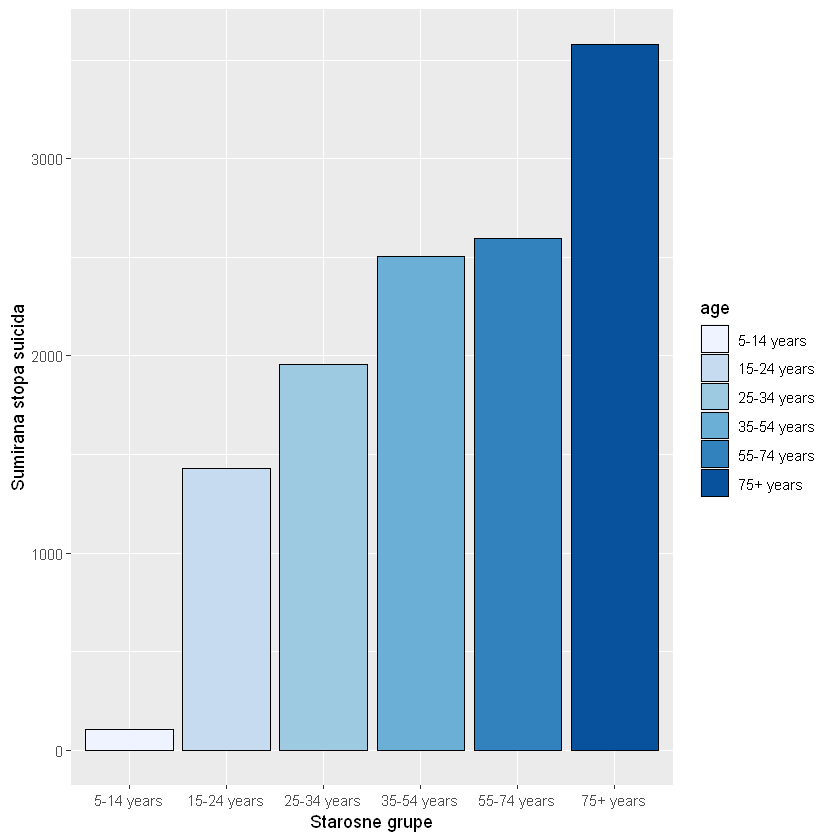

In [7]:
year2009.age.agg <- aggregate(year2009["suicides.100k.pop"], list(age=year2009$age), sum)

#install.packages("RColorBrewer")

library(ggplot2)
library(RColorBrewer)

ggplot(year2009.age.agg, aes(x=age, y=suicides.100k.pop, fill=age)) + 
geom_bar(stat="identity", color="black") + 
labs(x="Starosne grupe", y="Sumirana stopa suicida") + 
scale_fill_brewer(palette="Blues")

3. Koji pol je skloniji suicidu?

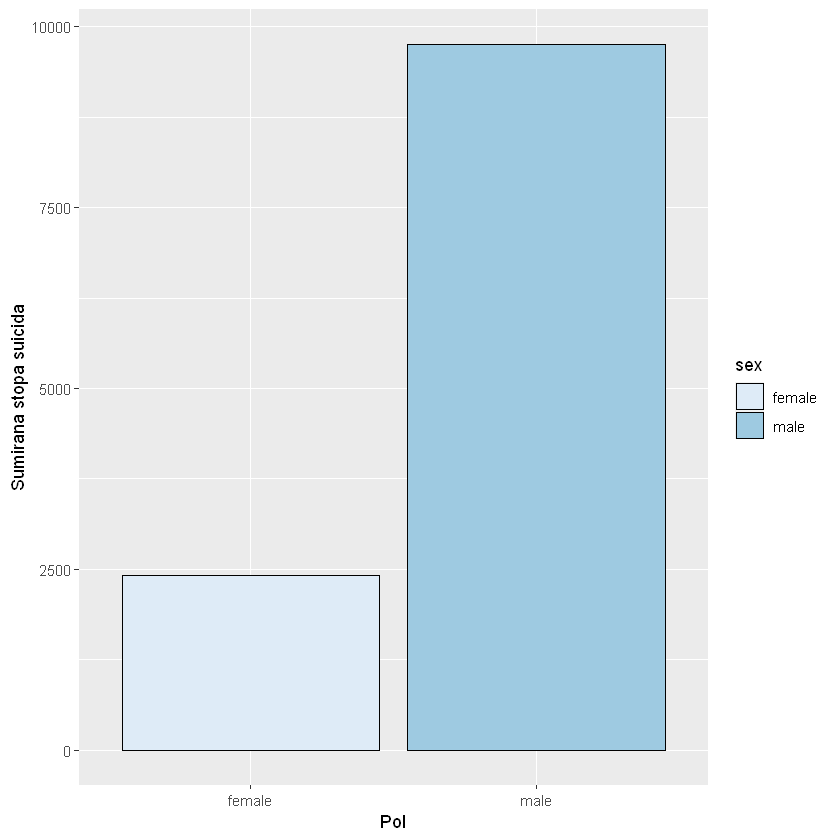

In [8]:
year2009.sex.agg <- aggregate(year2009["suicides.100k.pop"], list(sex = year2009$sex), sum)

ggplot(year2009.sex.agg, aes(x=sex, y=suicides.100k.pop, fill=sex)) + 
geom_bar(stat="identity", color="black") + 
labs(x="Pol", y="Sumirana stopa suicida") + 
scale_fill_brewer(palette="Blues")

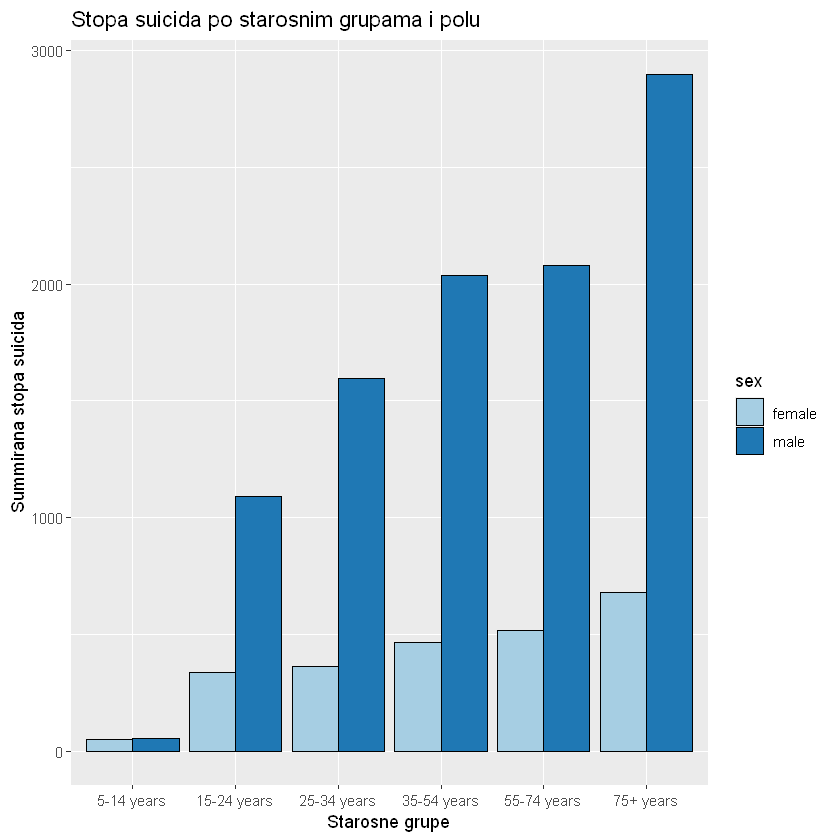

In [9]:
sex.age.agg <- aggregate(year2009["suicides.100k.pop"], list(sex = year2009$sex, age = year2009$age), sum)

ggplot(sex.age.agg, aes(x = age, y = suicides.100k.pop, fill = sex)) +
geom_bar(stat="identity", color="black", position = "dodge") + 
scale_fill_brewer(palette="Paired") +
labs(x = "Starosne grupe", y= "Summirana stopa suicida", title="Stopa suicida po starosnim grupama i polu")

4. U kojoj generaciji je suicid zastupljeniji?

In [10]:
generation <- aggregate(year2009["suicides.100k.pop"], list(generation=year2009$generation), sum)
generation

generation,suicides.100k.pop
<fct>,<dbl>
Silent,6177.07
Boomers,2506.18
Generation X,1957.17
Millenials,1429.18
Generation Z,106.44


5. Od čega zavisi stopa suicida?
  Za odgovor na ovo pitanje moram koristiti i vairjablu sa HDI vrednostim. Početna hipoteza je da stopa zavisi od HDI-ja i GDP-ja. Koristiće se godina sa najvećim brojem HDI opservacija.

In [11]:
hdi.df <- as.data.frame(reworked.df[is.na(reworked.df$hdi.for.year) == FALSE, ])
which.max(table(hdi.df$year))

2010 
   6

In [12]:
year2010 <- as.data.frame(hdi.df[hdi.df$year == 2010, ])
head(year2010)

,country,year,sex,age,suicides.no,population,suicides.100k.pop,country.year,hdi.for.year,gdp.for.year,gdp.per.capita,generation
,<chr>,<int>,<fct>,<ord>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<fct>
253,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,11926953259,4359,Silent
254,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,11926953259,4359,Generation X
255,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,11926953259,4359,Generation X
256,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,11926953259,4359,Silent
257,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,11926953259,4359,Millenials
258,Albania,2010,female,25-34 years,6,183579,3.27,Albania2010,0.722,11926953259,4359,Generation X


In [13]:
year2010.agg <- aggregate(
    year2010[ , c("hdi.for.year", "gdp.for.year", "gdp.per.capita")], list(country = year2010$country), unique)

year2010.agg2 <- aggregate(year2010[, c("suicides.no", "population")], list(country = year2010$country), sum)
year2010.agg2$suicides.100k.pop <- year2010.agg2$suicides.no / year2010.agg2$population
year2010.agg[c("suicides.no", "population", "suicides.100k.pop")] <- year2010.agg2[
    , c("suicides.no", "population", "suicides.100k.pop")]

head(year2010.agg)

,country,hdi.for.year,gdp.for.year,gdp.per.capita,suicides.no,population,suicides.100k.pop
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,Albania,0.722,1.192695e+10,4359,96,2736025,3.508740e-05
2,Argentina,0.811,4.236274e+11,11273,2943,37578454,7.831615e-05
3,Armenia,0.721,9.260285e+09,3460,73,2676225,2.727723e-05
4,Australia,0.927,1.144261e+12,54887,2420,20847547,1.160808e-04
5,Austria,0.879,3.918927e+11,49181,1264,7968421,1.586262e-04
6,Bahamas,0.774,1.009576e+10,30239,10,333869,2.995187e-05



	Shapiro-Wilk normality test

data:  year2010.agg$suicides.100k.pop
W = 0.93155, p-value = 0.0002438



	Shapiro-Wilk normality test

data:  year2010.agg$hdi.for.year
W = 0.96029, p-value = 0.01097


Warning message in cor.test.default(year2010.agg$hdi.for.year, year2010.agg$suicides.100k.pop, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  year2010.agg$hdi.for.year and year2010.agg$suicides.100k.pop
S = 59529, p-value = 0.0001826
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3972966 


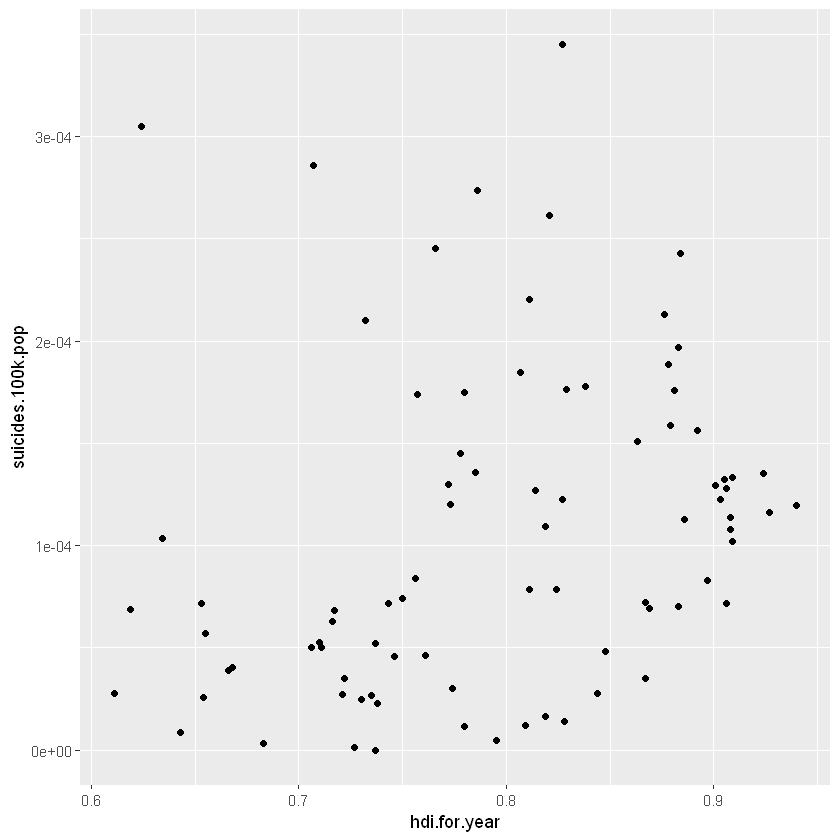

In [14]:
shapiro.test(year2010.agg$suicides.100k.pop)
shapiro.test(year2010.agg$hdi.for.year)

ggplot(year2010.agg, aes(hdi.for.year, suicides.100k.pop)) + geom_point()

cor.test(year2010.agg$hdi.for.year, year2010.agg$suicides.100k.pop, method="spearman")

Varijabla suicides.100k.pop nije normalno raspoređena.
Varijabla hdi.for.year nije normalno raspoređena.
Korelacija između ove dve varijable statistički značajna ali je slaba.


	Shapiro-Wilk normality test

data:  year2010.agg$gdp.per.capita
W = 0.83498, p-value = 2.966e-08



	Spearman's rank correlation rho

data:  year2010.agg$gdp.per.capita and year2010.agg$suicides.100k.pop
S = 74408, p-value = 0.02394
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2466538 


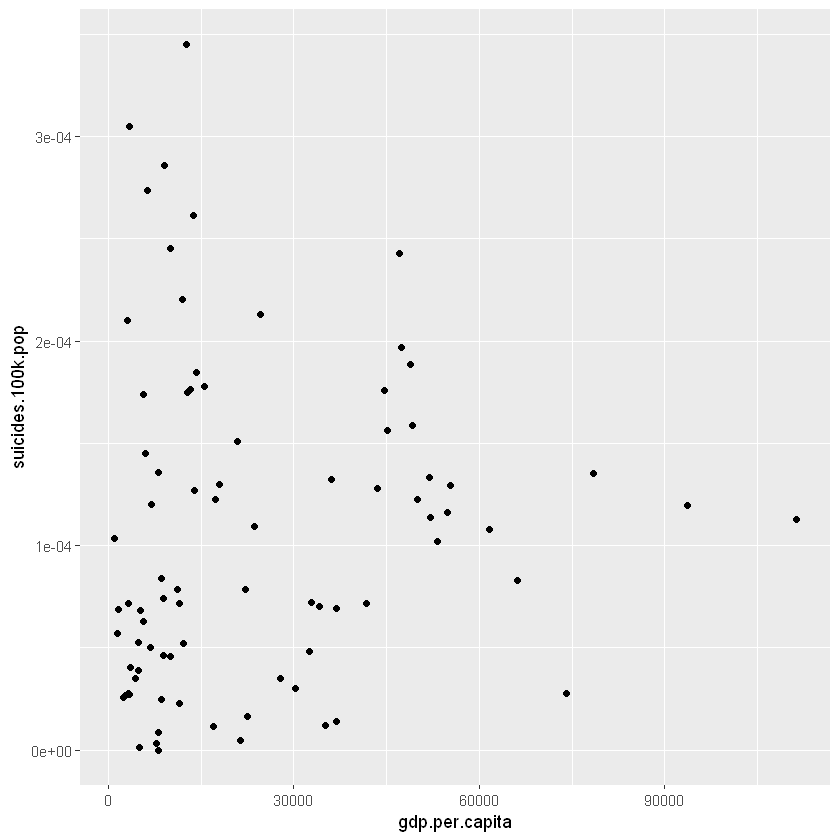

In [15]:
shapiro.test(year2010.agg$gdp.per.capita)
cor.test(year2010.agg$gdp.per.capita, year2010.agg$suicides.100k.pop, method="spearman")

ggplot(year2010.agg, aes(gdp.per.capita, suicides.100k.pop)) + geom_point()

Korelacija između ove dve varijable ne postoji ili nije značajna.

  Sada će se pristupiti modelovanju ovih podataka da eventualno predviđanje. Koristiće se decision tree analiza. 

In [16]:
#install.packages(c("rpart", "rpart.plot"))

library(rpart)
library(rpart.plot)

train.data <- as.data.frame(year2010.agg)
third.q <- quantile(train.data$suicides.100k.pop, 0.75)

train.data$high.rate <- ifelse(train.data$suicides.100k.pop > third.q, "Yes", "No")
train.data$high.rate <- as.factor(train.data$high.rate)
train.data[c("country", "suicides.100k.pop")] <- NULL

head(train.data)

,hdi.for.year,gdp.for.year,gdp.per.capita,suicides.no,population,high.rate
,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
1,0.722,1.192695e+10,4359,96,2736025,No
2,0.811,4.236274e+11,11273,2943,37578454,No
3,0.721,9.260285e+09,3460,73,2676225,No
4,0.927,1.144261e+12,54887,2420,20847547,No
5,0.879,3.918927e+11,49181,1264,7968421,Yes
6,0.774,1.009576e+10,30239,10,333869,No


n= 84 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 84 21 No (0.75000000 0.25000000)  
   2) suicides.no< 124 22  1 No (0.95454545 0.04545455) *
   3) suicides.no>=124 62 20 No (0.67741935 0.32258065)  
     6) population>=3200861 54 13 No (0.75925926 0.24074074)  
      12) suicides.no< 703.5 17  0 No (1.00000000 0.00000000) *
      13) suicides.no>=703.5 37 13 No (0.64864865 0.35135135)  
        26) population>=1.046851e+07 25  5 No (0.80000000 0.20000000)  
          52) suicides.no< 5607.5 18  1 No (0.94444444 0.05555556) *
          53) suicides.no>=5607.5 7  3 Yes (0.42857143 0.57142857) *
        27) population< 1.046851e+07 12  4 Yes (0.33333333 0.66666667) *
     7) population< 3200861 8  1 Yes (0.12500000 0.87500000) *


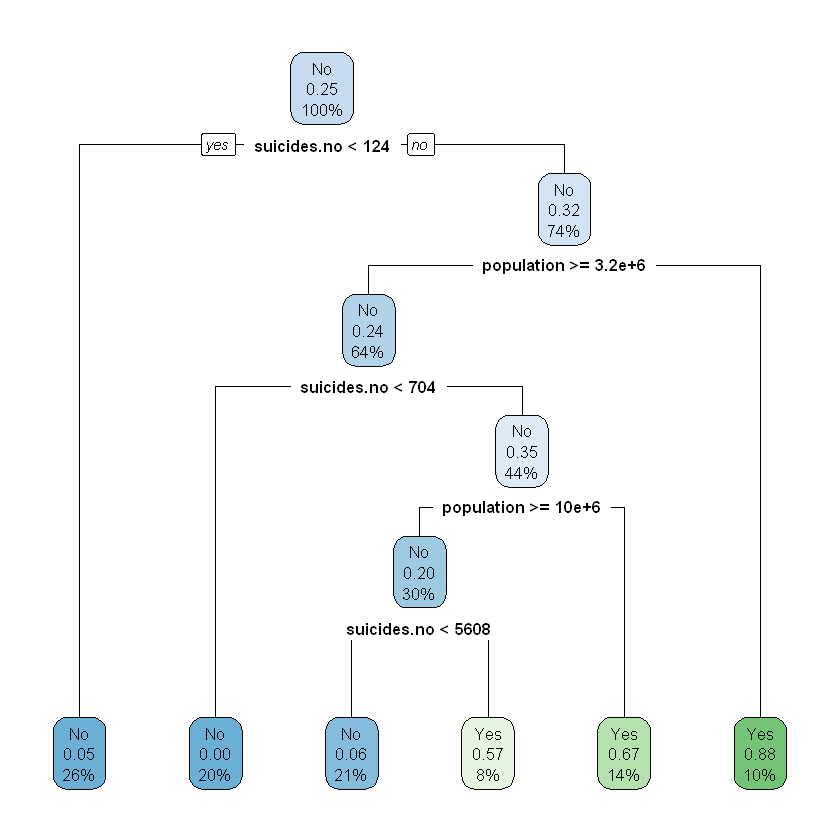

In [17]:
tree1 <- rpart(high.rate ~. , train.data, method = "class")
print(tree1)
rpart.plot(tree1)

  Probaću još jedan model kojem ću proslediti ceo dataset.

In [18]:
train.data2 <- as.data.frame(year2010)
q3 <- quantile(train.data2$suicides.100k.pop, 0.75)

train.data2$high.rate <- ifelse(train.data2$suicides.100k.pop > q3, "Yes", "No")
train.data2$high.rate <- as.factor(train.data2$high.rate)
train.data2[c("country", "year", "suicides.100k.pop", "country.year")] <- NULL

head(train.data2)

,sex,age,suicides.no,population,hdi.for.year,gdp.for.year,gdp.per.capita,generation,high.rate
,<fct>,<ord>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
253,male,55-74 years,20,241852,0.722,11926953259,4359,Silent,No
254,male,35-54 years,20,371611,0.722,11926953259,4359,Generation X,No
255,male,25-34 years,9,179720,0.722,11926953259,4359,Generation X,No
256,male,75+ years,2,50767,0.722,11926953259,4359,Silent,No
257,male,15-24 years,10,279508,0.722,11926953259,4359,Millenials,No
258,female,25-34 years,6,183579,0.722,11926953259,4359,Generation X,No


n= 1008 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1008 252 No (0.75000000 0.25000000)  
    2) sex=female 504  26 No (0.94841270 0.05158730) *
    3) sex=male 504 226 No (0.55158730 0.44841270)  
      6) suicides.no< 58.5 272  61 No (0.77573529 0.22426471)  
       12) population>=190637.5 124   4 No (0.96774194 0.03225806) *
       13) population< 190637.5 148  57 No (0.61486486 0.38513514)  
         26) suicides.no< 3.5 79   7 No (0.91139241 0.08860759) *
         27) suicides.no>=3.5 69  19 Yes (0.27536232 0.72463768)  
           54) suicides.no< 17.5 41  19 Yes (0.46341463 0.53658537)  
            108) population>=45716 24   5 No (0.79166667 0.20833333) *
            109) population< 45716 17   0 Yes (0.00000000 1.00000000) *
           55) suicides.no>=17.5 28   0 Yes (0.00000000 1.00000000) *
      7) suicides.no>=58.5 232  67 Yes (0.28879310 0.71120690)  
       14) hdi.for.year< 0.748 58  16 No (0.72413793 0.27586207)  
         28) pop

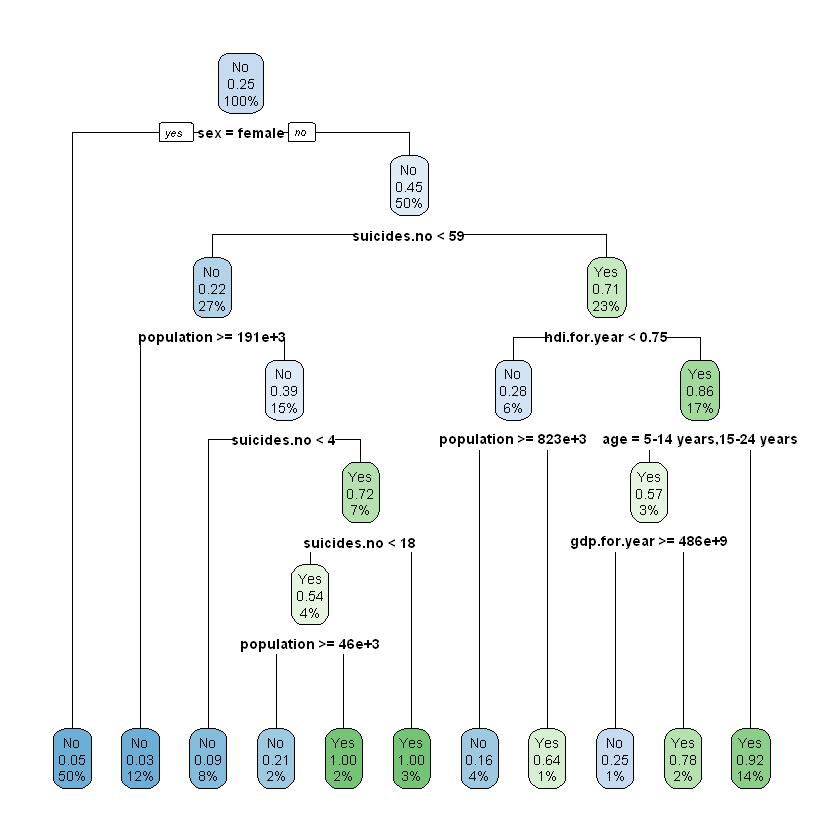

In [19]:
tree2 <- rpart(high.rate ~. , train.data2, method = "class")
print(tree2)
rpart.plot(tree2)

  Napraviću stablo na osnovu celog data seta a ne samo jedne godine.

In [20]:
#install.packages(caret)

library(caret)

quant3 <- quantile(hdi.df$suicides.100k.pop, 0.75)
hdi.df$high.rate <- ifelse(hdi.df$suicides.100k.pop > quant3, "Yes", "No")
hdi.df$high.rate <- factor(hdi.df$high.rate)
hdi.df[c("country", "year", "suicides.100k.pop", "country.year")] <- NULL

head(hdi.df)

Loading required package: lattice



,sex,age,suicides.no,population,hdi.for.year,gdp.for.year,gdp.per.capita,generation,high.rate
,<fct>,<ord>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
73,male,25-34 years,13,232900,0.619,2424499009,835,Generation X,No
74,male,55-74 years,9,178000,0.619,2424499009,835,Silent,No
75,female,75+ years,2,40800,0.619,2424499009,835,G.I. Generation,No
76,female,15-24 years,13,283500,0.619,2424499009,835,Generation X,No
77,male,15-24 years,11,241200,0.619,2424499009,835,Generation X,No
78,male,75+ years,1,25100,0.619,2424499009,835,G.I. Generation,No


n= 6692 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6692 1673 No (0.75000000 0.25000000)  
    2) sex=female 3341  204 No (0.93894044 0.06105956) *
    3) sex=male 3351 1469 No (0.56162340 0.43837660)  
      6) suicides.no< 48.5 1649  347 No (0.78956944 0.21043056)  
       12) population>=190676.5 725   10 No (0.98620690 0.01379310) *
       13) population< 190676.5 924  337 No (0.63528139 0.36471861)  
         26) suicides.no< 3.5 508   47 No (0.90748031 0.09251969) *
         27) suicides.no>=3.5 416  126 Yes (0.30288462 0.69711538)  
           54) suicides.no< 15.5 240  115 Yes (0.47916667 0.52083333)  
            108) population>=45716 122   21 No (0.82786885 0.17213115) *
            109) population< 45716 118   14 Yes (0.11864407 0.88135593) *
           55) suicides.no>=15.5 176   11 Yes (0.06250000 0.93750000) *
      7) suicides.no>=48.5 1702  580 Yes (0.34077556 0.65922444)  
       14) population>=438249 1332  570 Yes (0.42792793 0.57

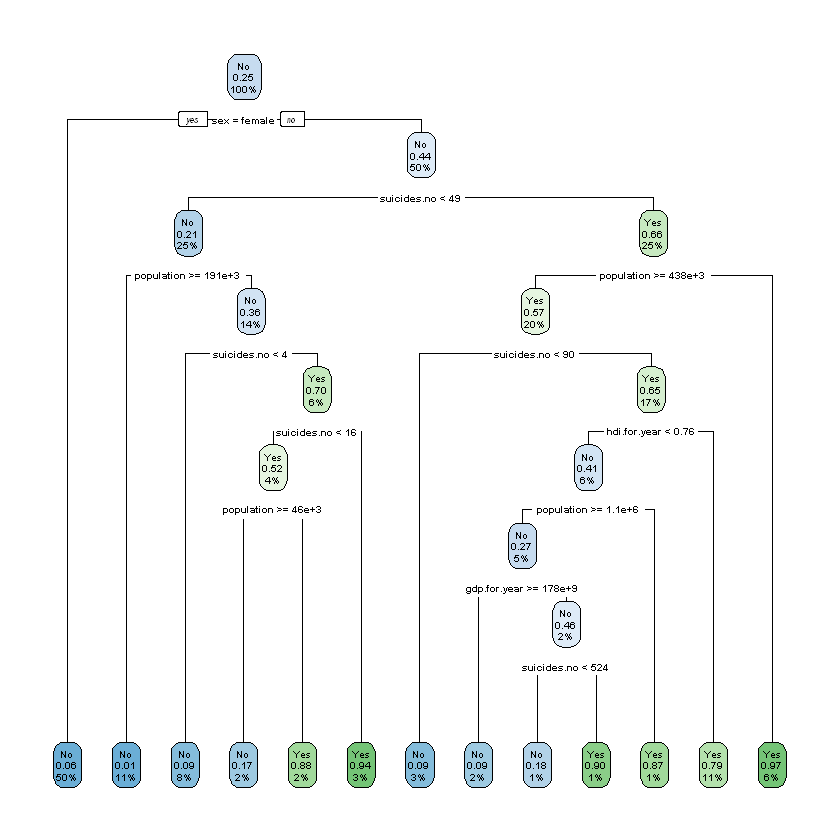

In [21]:
train.indices <- createDataPartition(hdi.df$high.rate, p=0.8, list=FALSE)
train.data3 <- hdi.df[train.indices, ]
test.data <- hdi.df[-train.indices, ]

tree3 <-rpart(high.rate ~. , train.data3, method = "class")
print(tree3)
rpart.plot(tree3)

In [22]:
#S obzirom da je stablo veliko te se plot ne vidi dobro, kod ispod pravi čitljivu sliku.
#png("FinalClassTree1.png", width=1280, height=960)
#rpart.plot(tree3)
#dev.off()


In [23]:
tree3.pred <- predict(tree3, test.data, type = "class")
tree3.cm <- table(true = test.data$high.rate, predicted = tree3.pred)
tree3.cm

     predicted
true    No  Yes
  No  1191   63
  Yes   87  331

In [24]:
compute.eval.metrics <- function(cmatrix) {
TP <- cmatrix[2,2]
TN <- cmatrix[1,1] 
FP <- cmatrix[1,2]
FN <- cmatrix[2,1]
acc <- sum(diag(cmatrix)) / sum(cmatrix)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)
F1 <- 2*precision*recall / (precision + recall)
c(accuracy = acc, precision = precision, recall = recall, F1 = F1)}

tree3.eval <- compute.eval.metrics(tree3.cm)
tree3.eval

accuracy precision    recall        F1 
0.9102871 0.8401015 0.7918660 0.8152709

                                               Zaključak

  Na osnovu ovih mera možemo zaključiti da ovaj model nije dovoljno precizan. Na osnovu Recall mere (339/339+79) vidimo da je model čak 79 pozitivnih vrednosti prediktovao kao negativne ili približno 19%. Druga mera, Precision (339/339+33) nam govori da je model 33 negativne vrednosti prediktovao kao pozitivne ili približno 9%. Zaključak je da je model sklon da realizovane pozitivne vrednosti lošije predviđa. U kontekstu ovih podataka u približno 19% slučajeva model je realizovanu visoku stopu suicida evaluirao kao nisku. 

  Razlog bi bili sami podaci. Naime varijable preko kojih želimo da prediktujemo neku drugu varijablu moraju da dele zajednički varijabilitet, odnosno da preko njih možemo da objasnimo varijablu čije vrednosti želimo da predviđamo.

  U ovom slučaju, kao odgovor na 5. pitanje (od čega zavisi stopa suicida?) smo pokazali da stopa suicida ne zavisi od GDP-a, dok sa HDI-em postoji značajna korelacija iako je ona ipak slaba. Ukoliko pogledamo grafik stabla možemo videti da ono koristi za odlučivanje HDI i GDP (iako korelacije nema). Ipak, koristi ih za odlučivanje samo po jednom. Razlog zašto najviše koristi varijable "suicides.no" i "population" je logičan s obzirom da smo "sucides.100k.pop" izračunali preko prethodne dve varijable.
 
  Upravo ova činjenica se i odražava na preciznost našeg modela. Da bi povećali preciznost modela (pri tom i odgovorili na 5. pitanje) morali bi da imamo neke dodatne varijable koje će bliže i bolje objašnjavati stopu suicida u državama.
 
  Zanimljivo je primetiti da možemo intuitivno razumeti kako stablo odlučuje (koje varijable koristi) preko prethodnih pet pitanja tj. odgovora na njih (pokazano je da je stopa suicida daleko viša kod muškaraca, s toga stablo i kreće sa pitanjem o polu, gde slučajeve stope sucida za ženski pol uopšte i ne razmatra).